In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load Titanic dataset from seaborn
titanic = sns.load_dataset('titanic')
print(titanic.head())

   survived  pclass     sex   age  ...  deck  embark_town  alive  alone
0         0       3    male  22.0  ...   NaN  Southampton     no  False
1         1       1  female  38.0  ...     C    Cherbourg    yes  False
2         1       3  female  26.0  ...   NaN  Southampton    yes   True
3         1       1  female  35.0  ...     C  Southampton    yes  False
4         0       3    male  35.0  ...   NaN  Southampton     no   True

[5 rows x 15 columns]


In [ ]:
# select relevant columns
data = titanic[['survived','age','sex','class']]

# Drop rows with missing aage
data = data.dropna()


In [ ]:
#convert categorical to numeric

data['sex'] = data['sex'].map({'male':0,'female':1})
data['class'] = data['class'].map({'Third':3, 'Second': 2,'First':1})

x = data[['age','sex','class']]
y = data['survived']

print(x.head())
print(y.head())

    age  sex class
0  22.0    0     3
1  38.0    1     1
2  26.0    1     3
3  35.0    1     1
4  35.0    0     3
0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print("Training size:", len(x_train))
print("Testing size:", len(x_test))

Training size: 571
Tesing size: 143


In [ ]:
# Initialize and train model
clf= DecisionTreeClassifier(criterion='entropy',max_depth=4, random_state=42)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [ ]:
# Predictions
y_pred=clf.predict(x_test)

#Accuracy
print("Accuracy", accuracy_score(y_test, y_pred))

#Classification report
print("\nClassification Report:\n", classification_report(y_test,y_pred))

#confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))

Accuracy 0.7482517482517482

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.80        87
           1       0.71      0.61      0.65        56

    accuracy                           0.75       143
   macro avg       0.74      0.72      0.73       143
weighted avg       0.74      0.75      0.74       143


Confusion Matrix:
 [[73 14]
 [22 34]]


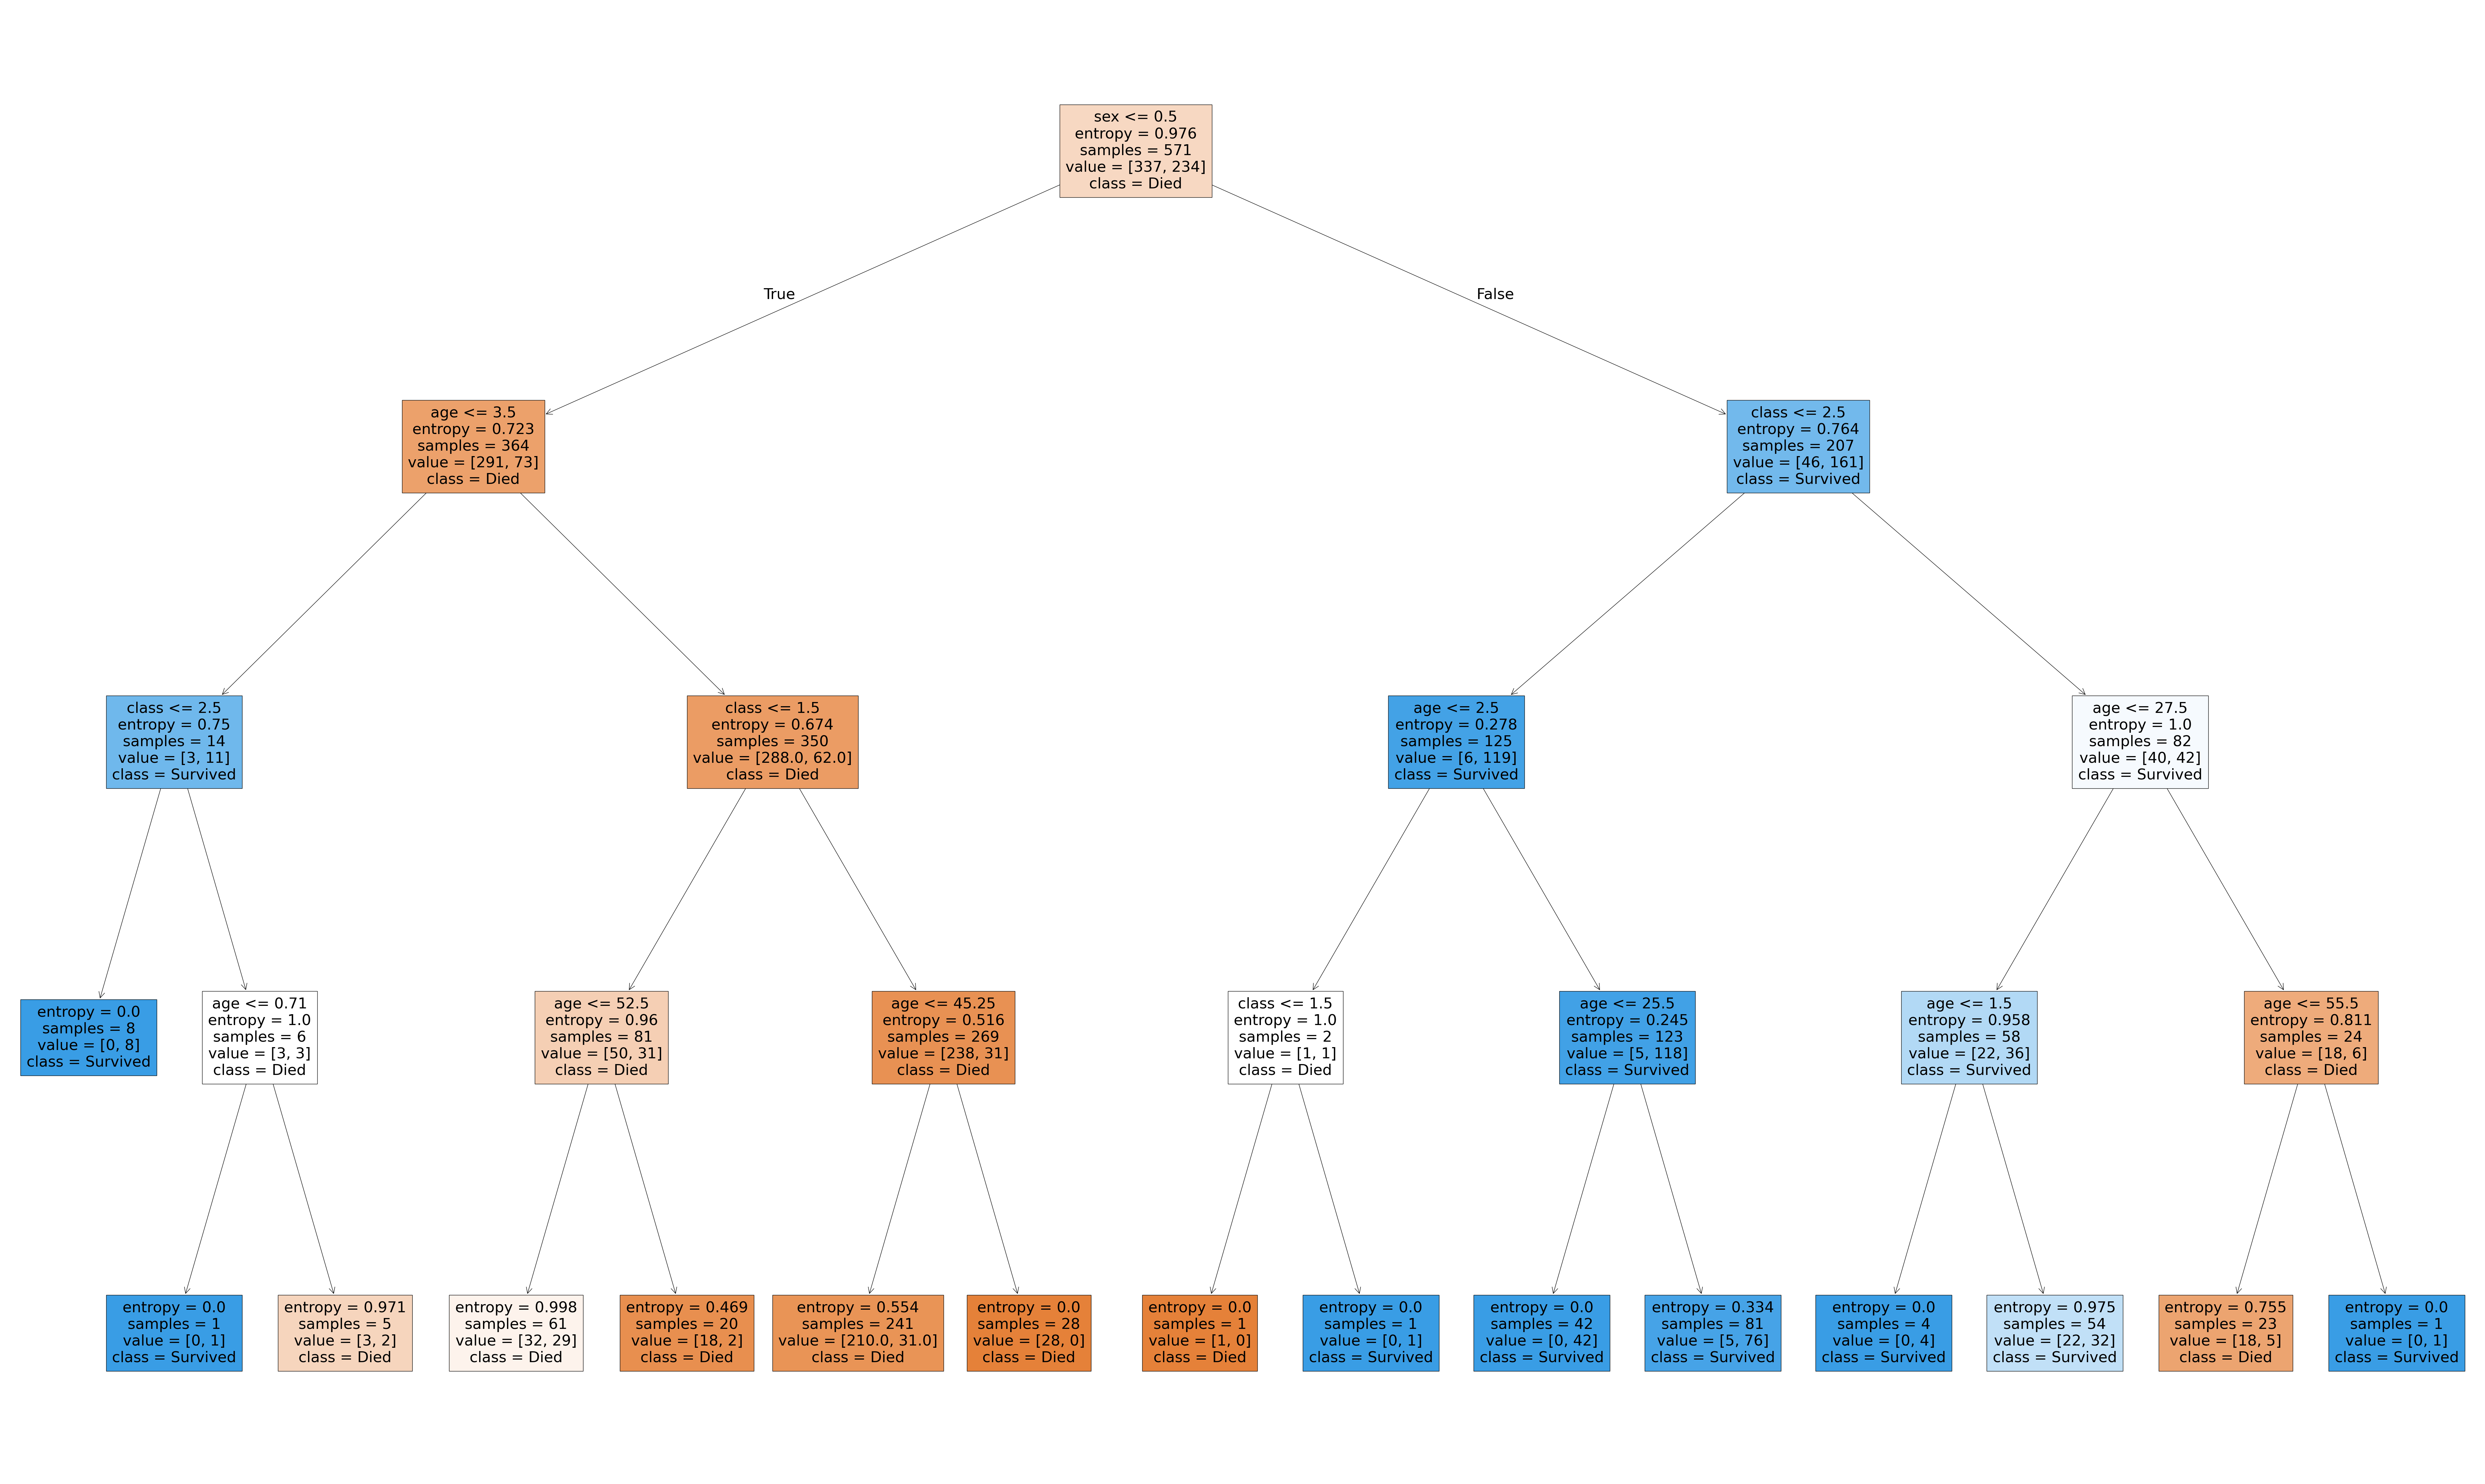

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(100, 60))
plot_tree(clf, feature_names=['age','sex','class'], class_names=['Died', 'Survived'], filled=True)
plt.show()